# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

WeatherPy Analysis -

In this notetook, I created a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, I utilized a simple Python library and the OpenWeatherMap API to create a representative model of weather across world cities.

The cities with the highest temperatures are found around 20 and -20 degrees from the equator, while the coldest temperatures are between 60-80 degrees from the equator. There is no correlation between latitude and cloudiness, humidity, or wind speed.

In [19]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [20]:
import sys
print(sys.getrecursionlimit())

5000


In [21]:
sys.setrecursionlimit(5000)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
process_record = 0
set_counter = 1
cities_weather = []

for city in cities:
    
     # Increase counter by one 
    process_record += 1
    print(f"Processing Record {process_record} of Set {set_counter} | {city}")

    if(process_record==50):
        set_counter+=1
        process_record=0
    
    query_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"

    try:
        response = requests.get(query_url).json()
        cities_weather.append({'City':city,
                               'Lat':response['coord']['lat'],
                               'Lng':response['coord']['lon'],
                               'Max Temp':response['main']['temp_max'],
                               'Humidity':response['main']['humidity'],
                               'Cloudiness':response['clouds']['all'],
                               'Wind Speed':response['wind']['speed'],
                               'Country':response['sys']['country'],
                               'Date':response['dt']})
    except:
        print('City not found. Skipping...')
        pass
        
    
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')
        

Processing Record 1 of Set 1 | sola
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | inhambane
Processing Record 5 of Set 1 | zemio
Processing Record 6 of Set 1 | manado
Processing Record 7 of Set 1 | poronaysk
Processing Record 8 of Set 1 | beian
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | camacha
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | fougamou
Processing Record 17 of Set 1 | copiapo
Processing Record 18 of Set 1 | oume
Processing Record 19 of Set 1 | birin
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 23 of Set 1 | qaqortoq
Processing R

Processing Record 41 of Set 4 | russell
Processing Record 42 of Set 4 | kasongo
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | carutapera
Processing Record 45 of Set 4 | opuwo
Processing Record 46 of Set 4 | krasnoselkup
Processing Record 47 of Set 4 | flinders
Processing Record 48 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 49 of Set 4 | dezful
Processing Record 50 of Set 4 | kupino
Processing Record 1 of Set 5 | puerto quijarro
Processing Record 2 of Set 5 | barkhan
Processing Record 3 of Set 5 | yuksekova
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | srednekolymsk
Processing Record 6 of Set 5 | ketchikan
Processing Record 7 of Set 5 | hilo
Processing Record 8 of Set 5 | montrose
Processing Record 9 of Set 5 | san patricio
Processing Record 10 of Set 5 | binzhou
Processing Record 11 of Set 5 | aswan
Processing Record 12 of Set 5 | bilma
Processing Record 13 of Set 5 | soyo
Processing Record 14 of Set 5 | longonjo

Processing Record 39 of Set 8 | oussouye
Processing Record 40 of Set 8 | a
City not found. Skipping...
Processing Record 41 of Set 8 | portobelo
Processing Record 42 of Set 8 | huangzhai
Processing Record 43 of Set 8 | hobbs
Processing Record 44 of Set 8 | puerto del rosario
Processing Record 45 of Set 8 | balykshi
Processing Record 46 of Set 8 | sugod
Processing Record 47 of Set 8 | jiujiang
Processing Record 48 of Set 8 | hella
Processing Record 49 of Set 8 | pemangkat
Processing Record 50 of Set 8 | beloha
Processing Record 1 of Set 9 | lorengau
Processing Record 2 of Set 9 | mantua
Processing Record 3 of Set 9 | mehran
Processing Record 4 of Set 9 | sao jose da coroa grande
Processing Record 5 of Set 9 | banjar
Processing Record 6 of Set 9 | bandraboua
Processing Record 7 of Set 9 | yurla
Processing Record 8 of Set 9 | marondera
Processing Record 9 of Set 9 | tyulyachi
Processing Record 10 of Set 9 | vegachi
Processing Record 11 of Set 9 | ipixuna
Processing Record 12 of Set 9 | li

Processing Record 25 of Set 12 | alto longa
Processing Record 26 of Set 12 | dali
Processing Record 27 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 28 of Set 12 | tekeli
Processing Record 29 of Set 12 | darhan
Processing Record 30 of Set 12 | pangnirtung
Processing Record 31 of Set 12 | broken hill
Processing Record 32 of Set 12 | gushikawa
Processing Record 33 of Set 12 | wa
City not found. Skipping...
Processing Record 34 of Set 12 | esterhazy
Processing Record 35 of Set 12 | bakel
Processing Record 36 of Set 12 | mus
Processing Record 37 of Set 12 | kijang
Processing Record 38 of Set 12 | fort saint james
Processing Record 39 of Set 12 | wahran
City not found. Skipping...
Processing Record 40 of Set 12 | jumla
Processing Record 41 of Set 12 | lixourion
Processing Record 42 of Set 12 | energetik
Processing Record 43 of Set 12 | clearwater
Processing Record 44 of Set 12 | ponta delgada
Processing Record 45 of Set 12 | sakakah
Processing Record 46 of Set 12 | pha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Display the DataFrame
cities = pd.DataFrame(cities_weather)
cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sola,-13.88,167.55,80.60,88,75,19.04,VU,1602518561
1,saldanha,-33.01,17.94,71.60,35,61,12.75,ZA,1602518374
2,inhambane,-23.86,35.38,69.80,68,75,2.24,MZ,1602518410
3,zemio,5.03,25.14,75.67,83,100,1.77,CF,1602518517
4,manado,1.49,124.85,77.00,94,20,3.67,ID,1602518561
...,...,...,...,...,...,...,...,...,...
570,wewak,-3.55,143.63,80.38,85,89,8.12,PG,1602518607
571,artyom,40.47,50.33,62.60,63,40,9.17,AZ,1602518607
572,saint-ambroise,48.55,-71.33,41.00,65,20,3.36,CA,1602518607
573,aksum,14.12,38.72,64.00,53,82,2.68,ET,1602518607


In [26]:
# Export the data to csv
cities.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

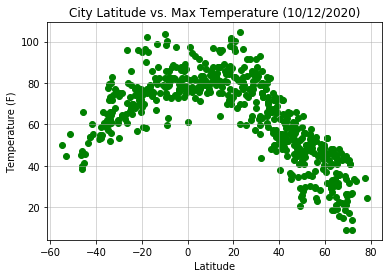

In [27]:
# Latitude Vs Temperature Scatter Plot 
plt.scatter(cities['Lat'],cities['Max Temp'],facecolors = "green", marker ="o")
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("./output_data/City_Latitude_vs_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

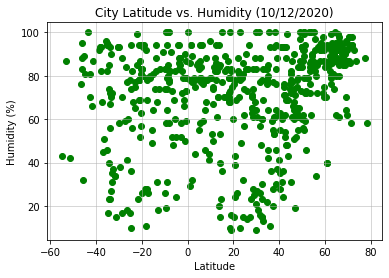

In [28]:
# Latitude vs. Humidity Scatter Plot 
plt.scatter(cities["Lat"],cities["Humidity"],facecolors = "green", marker ="o")
plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("./output_data/City_Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

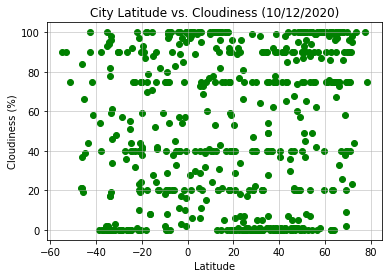

In [29]:
# Latitude vs. Cloudiness Scatter Plot - **ADD CLEAN DATAFRAME?
plt.scatter(cities['Lat'],cities['Cloudiness'],facecolors = "green", marker ="o")
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("./output_data/City_Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

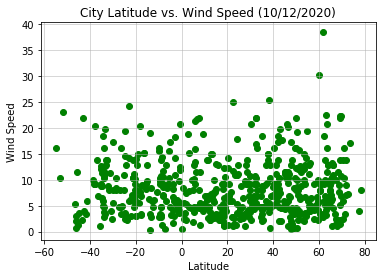

In [54]:
# Latitude vs. Wind Speed Scatter Plot 
plt.scatter(cities["Lat"],cities["Wind Speed"],facecolors = "green", marker ="o")
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("./output_data/City_Latitude_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [39]:
# Creating a function to create Linear Regression plots 

def linregression_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(60,60),fontsize=10,color="black", xycoords = "figure points")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    
    


In [33]:

# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = cities.loc[cities['Lat'] >= 0]
northern_hemisphere_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,zemio,5.03,25.14,75.67,83,100,1.77,CF,1602518517
4,manado,1.49,124.85,77.00,94,20,3.67,ID,1602518561
5,poronaysk,49.22,143.12,52.48,97,100,0.72,RU,1602518561
6,beian,63.66,9.57,48.20,81,75,11.41,NO,1602518561
7,severo-kurilsk,50.68,156.12,45.57,79,91,12.12,RU,1602518561
...,...,...,...,...,...,...,...,...,...
568,spring hill,28.48,-82.53,84.99,61,20,9.17,US,1602518565
571,artyom,40.47,50.33,62.60,63,40,9.17,AZ,1602518607
572,saint-ambroise,48.55,-71.33,41.00,65,20,3.36,CA,1602518607
573,aksum,14.12,38.72,64.00,53,82,2.68,ET,1602518607


In [34]:
southern_hemisphere_df = cities.loc[cities['Lat'] < 0]
southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sola,-13.88,167.55,80.60,88,75,19.04,VU,1602518561
1,saldanha,-33.01,17.94,71.60,35,61,12.75,ZA,1602518374
2,inhambane,-23.86,35.38,69.80,68,75,2.24,MZ,1602518410
9,rikitea,-23.12,-134.97,74.12,75,32,14.27,PF,1602518365
10,busselton,-33.65,115.33,55.99,90,59,12.66,AU,1602518367
...,...,...,...,...,...,...,...,...,...
561,calvinia,-31.47,19.78,76.24,15,48,11.39,ZA,1602518606
563,caloundra,-26.80,153.13,64.99,84,36,8.01,AU,1602518606
566,salinopolis,-0.61,-47.36,86.59,59,2,12.39,BR,1602518607
569,ampanihy,-24.70,44.75,67.78,74,44,14.54,MG,1602518607


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7467809594838228


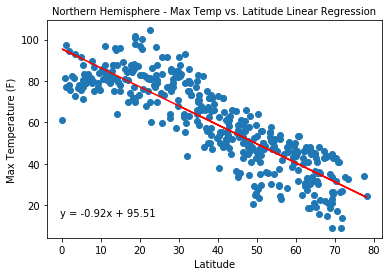

In [40]:
linregression_plot(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression", size = 10)

plt.savefig("./output_data/NH_MaxTemp_vs_Lat_regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5073018665858735


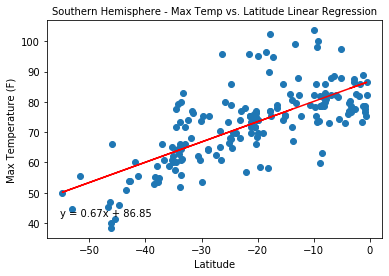

In [41]:
linregression_plot(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression", size = 10)

plt.savefig("./output_data/SH_MaxTemp_vs_Lat_regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07814669576449883


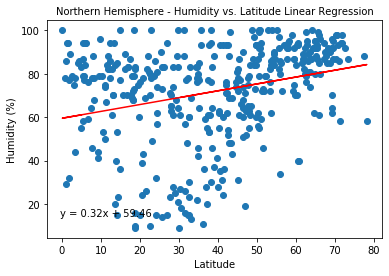

In [46]:
linregression_plot(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression", size = 10)

plt.savefig("./output_data/NH_Humidity_vs_Lat_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007926721603109607


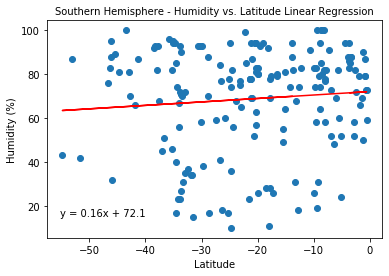

In [47]:
linregression_plot(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression", size = 10)

plt.savefig("./output_data/SH_Humidity_vs_Lat_regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.027158049857741503


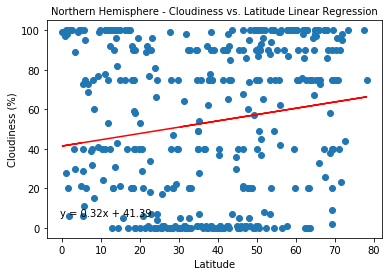

In [48]:
linregression_plot(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", size = 10)

plt.savefig("./output_data/NH_Cloudiness_vs_Lat_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008721382528350972


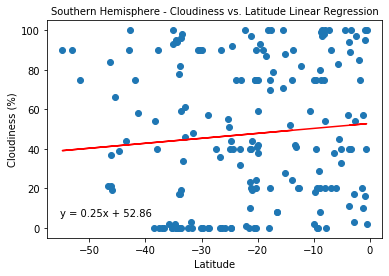

In [53]:
linregression_plot(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", size = 10)

plt.savefig("./output_data/SH_Cloudiness_vs_Lat_regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01008551678060963


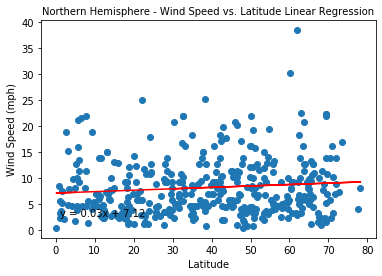

In [50]:
linregression_plot(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", size = 10)

plt.savefig("./output_data/NH_Windspeed_vs_Lat_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004341003857917358


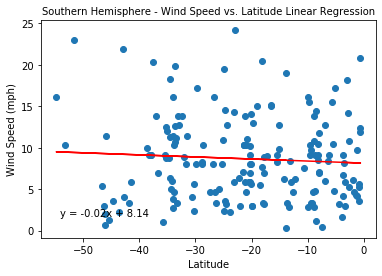

In [52]:
linregression_plot(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", size = 10)

plt.savefig("./output_data/SH_Windspeed_vs_Lat_regression.png")
plt.show()